# Clustering a segmented defect point cloud using DBSCAN method

This notebook is to explore clustering analysis using OPTICS method on a point cloud dataset.

In [2]:
import sys
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import rcParams

import sklearn

from collections import Counter

sys.path.insert(0, 'C:/Users/umroot/Downloads/Jupiter Majid/Point cloud clustering/src')
from OPTICS import optics

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 13,10
# color theme: Red, Green, Blue, Cyan, Magenta, Yellow(dark khaki), Brown, Pink 
colors_theme = np.array(['r', 'g', 'b', 'c', 'm', 'y', 'brown', 'pink'])

# Reading the dataset

The dataset is a point cloud in csv file format an contains the defect segmented points. Every row represents a point with six features of xyz cordination and RGB color information.

In [4]:
de = pd.read_csv('C:/Users/umroot/Downloads/Jupiter Majid/Point cloud clustering/defect.csv')
de.head()

,X,Y,Z,R,G,B
0,0.019,0.032,0.022,144,145,131
1,0.018,0.019,0.089,90,72,60
2,0.391,0.035,0.107,97,102,79
3,0.267,0.047,0.153,130,137,129
4,0.266,0.047,0.136,117,118,110


# 3D and 2D visualization of the dataset

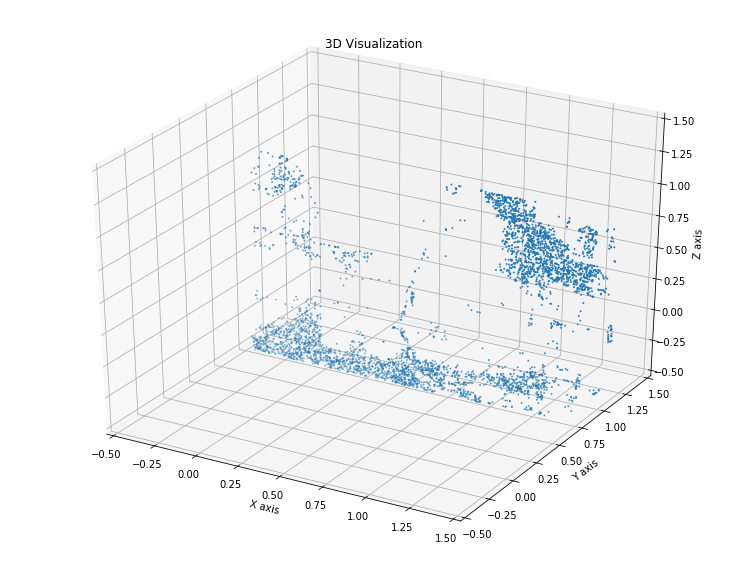

Text(0,0.5,'Z axis')

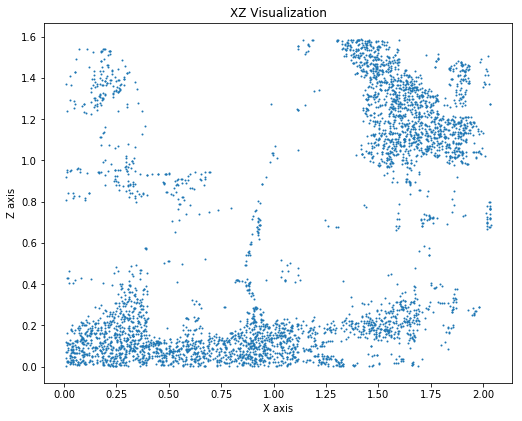

In [6]:
#3D Visualization.
fig = plt.figure()
ax1 = fig.add_subplot(111, projection = '3d')

#It is necessary to fix the axis limits in order to visualize the dataset in scale.
x_limit = ax1.get_xlim()
x_range = x_limit[1] - x_limit[0]
x_mid = np.mean(x_limit)

y_limit = ax1.get_ylim()
y_range = y_limit[1] - y_limit[0]
y_mid = np.mean(y_limit)

z_limit = ax1.get_zlim()
z_range = z_limit[1] - z_limit[0]
z_mid = np.mean(z_limit)

maximum_range = max([x_range, y_range, z_range])

ax1.set_xlim([x_mid - maximum_range, x_mid + maximum_range])
ax1.set_ylim([y_mid - maximum_range, y_mid + maximum_range])
ax1.set_zlim([z_mid - maximum_range, z_mid + maximum_range])
#colors = (de.R, de.G, de.B)
ax1.scatter(de.X, de.Y, de.Z, s=1)
ax1.set_title("3D Visualization")
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')
plt.show()


# 2D visualization
fig = plt.figure()
ax2 = fig.add_axes([.1,.1,.5,.5])

ax2.scatter(de.X, de.Z, s=1)
ax2.set_title('XZ Visualization')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Z axis')

# Clustering the defects using OPTICS method

In [8]:
data = de.drop("Y", axis=1)
data = data.drop("R", axis=1)
data = data.drop("B", axis=1)
data = data.drop("G", axis=1)

OPTICS(algorithm='auto', leaf_size=30, max_eps=0.05, maxima_ratio=0.75,
    metric='minkowski', metric_params=None, min_cluster_size=0.005,
    min_maxima_ratio=0.001, min_samples=20, n_jobs=None, p=2,
    rejection_ratio=0.7, significant_min=0.003, similarity_threshold=0.4)
Counter({1: 1605, 5: 1413, 2: 311, 0: 216, 3: 210, 4: 158, 7: 122, 6: 93, 8: 46})


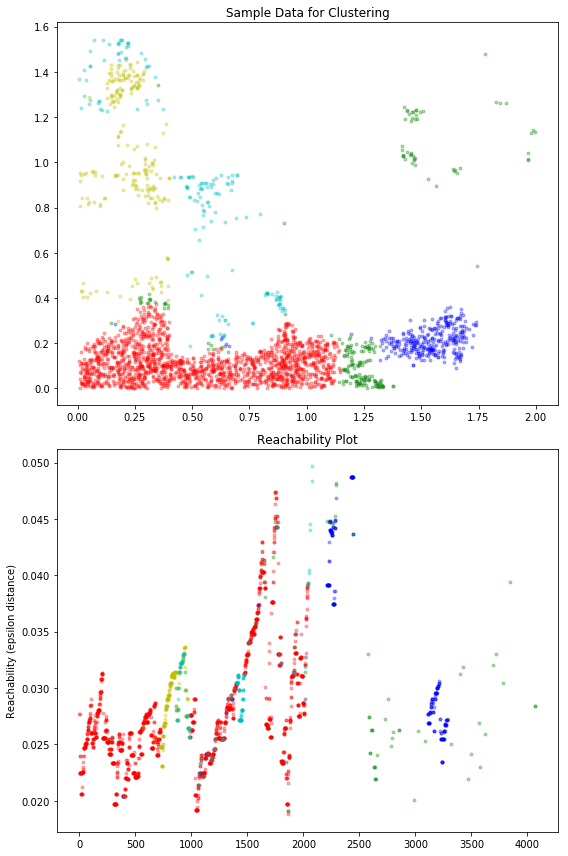

In [15]:
clust = optics.OPTICS(min_samples=20,max_eps=.05)
print clust
X = data.values
clust.fit(X)
clust.labels_ += 1
space = np.arange(len(X))

reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

print Counter(clust.labels_)


fig, (ax2, ax1) = plt.subplots(2, 1, figsize=(8, 12))
# Reachability plot
color = ['g.', 'r.', 'b.', 'y.', 'c.', 'm.', 'yellow', 'plum', 'maroon', 'coral']
for k, c in zip(range(0, 5), color):
    Xk = space[clust.labels_  == k]
    Rk = reachability[clust.labels_  == k]
    ax1.plot(Xk, Rk, c, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
ax1.set_ylabel('Reachability (epsilon distance)')
ax1.set_title('Reachability Plot')



color = ['g.', 'r.', 'b.', 'y.', 'c.', 'm.', 'yellow', 'plum', 'maroon', 'coral']
for k, c in zip(range(0, 5), color):
    Xk = X[clust.labels_ == k]
    ax2.plot(Xk[:, 0], Xk[:, 1], c, alpha=0.3)
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], 'k.', alpha=0.25)
ax2.set_title("Sample Data for Clustering")
plt.tight_layout()
plt.savefig('optics_example.png')